# Sprint #2 Acamica -- Proyecto Inmobiliario

In [62]:
import warnings
warnings.filterwarnings('ignore')
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [63]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


## Iniciamos nuestra exploracion de datos

Primero, observamos como esta construido nuestro Dataset.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [65]:
profile = ProfileReport(df, title="Pandas Profiling Report", minimal=True)
profile.to_notebook_iframe()

## Despues de visualizar cada variable:

Decidimos cuales variables no nos interesan, o que pueden  estar representadas por otras variables.

Al igual que en el Sprint 1: decidimos que algunas variables importantes para la prediccion del precio de la casa son principalmente: La ubicacion, el tamaño, habitaciones/baños y por ultimo el tipo de propiedad.

Tambien podemos visualizar cuales son las variables con el mayor numero de datos nulos.

In [66]:
non_interesting = ['start_date',
                  'end_date',
                  'created_on',
                  'l1',
                  'l2',
                  'currency',
                  'title',
                  'description',
                  'operation_type']

df.drop(columns = non_interesting, inplace = True)

Eliminamos las variables a las cuales no les vemos valor, o que las vemos representadas por otras.

<AxesSubplot:>

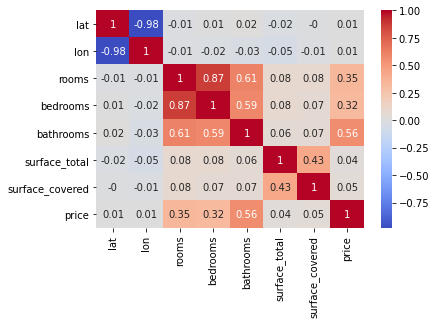

In [67]:
sns.heatmap(df.corr().round(2), annot = True, cmap = 'coolwarm')

Verificamos las correlaciones para concluir que variables nos pueden ayudar a predecir aquellas con valores faltantes.

In [68]:
df[df.lat.isnull()]

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
17,NaN,NaN,Tigre,2.0,1.0,1.0,53.0,42.0,145000.0,Departamento
26,NaN,NaN,Morón,2.0,1.0,1.0,45.0,45.0,110000.0,Departamento
35,NaN,NaN,Palermo,2.0,1.0,2.0,81.0,76.0,410000.0,Departamento
36,NaN,NaN,Palermo,2.0,1.0,1.0,42.0,38.0,169000.0,Departamento
46,NaN,NaN,Palermo,2.0,1.0,1.0,52.0,46.0,159500.0,Departamento
...,...,...,...,...,...,...,...,...,...,...
146571,NaN,NaN,Tigre,2.0,1.0,2.0,57.0,46.0,120000.0,Departamento
146575,NaN,NaN,Tigre,2.0,1.0,2.0,64.0,56.0,141000.0,Departamento
146577,NaN,NaN,Tigre,3.0,2.0,2.0,89.0,71.0,167000.0,Departamento
146578,NaN,NaN,Tigre,3.0,2.0,2.0,89.0,71.0,167000.0,Departamento


Observamos que en gran manera los datos que les falta lat, tambien les falta lon, vamos a verificar en la siguiente celda.

In [69]:
df[df.lat.isnull() & df.lon.isnull()].shape[0] / df.lat.isnull().sum()

1.0

In [70]:
df.lat.isnull().sum() / df.shape[0]

0.06767353061502795

Para que no haya data leakage, de una vez separamos nuestro Train set y nuestro Test set.

In [71]:
from sklearn.model_selection import train_test_split

y = df.price.copy()
X = df.drop(columns = 'price').copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Vamos a remplazar nuestros valores que faltan de lon y lat dependiendo de la media de estos para cada barrio. Nos dara unas coordenadas no muy alejadas de la realidad.

In [72]:
barrios = X_train.groupby('l3').agg('mean')[['lon', 'lat']]
barrios

,lon,lat
l3,,
Abasto,-58.412078,-34.603921
Agronomía,-58.490098,-34.593935
Almagro,-58.421611,-34.605747
Almirante Brown,-58.388359,-34.813652
Avellaneda,-58.345344,-34.683075
...,...,...
Villa Riachuelo,-58.472775,-34.690259
Villa Santa Rita,-58.481693,-34.615209
Villa Soldati,-58.442334,-34.660863


In [73]:
X_train.loc[X_train.lat.isnull(), 'lat'] = X_train['l3'].map(barrios.lat)
X_train.loc[X_train.lon.isnull(), 'lon'] = X_train['l3'].map(barrios.lon)



In [74]:
X_train[X_train.lon.isnull()]

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type


In [75]:
X_train[X_train.bathrooms.isnull()]

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type
29009,-34.598119,-58.387780,Recoleta,3.0,2.0,NaN,NaN,NaN,Departamento
116349,-34.622510,-58.396630,San Cristobal,3.0,2.0,NaN,NaN,NaN,Departamento
58012,-34.550414,-58.697472,San Miguel,1.0,0.0,NaN,NaN,NaN,Departamento
12253,-34.579134,-58.475520,Villa Urquiza,1.0,1.0,NaN,34.0,34.0,Departamento
98250,-34.712672,-58.410550,Lanús,1.0,0.0,NaN,NaN,NaN,Depósito
...,...,...,...,...,...,...,...,...,...
48984,-34.332007,-58.743775,Escobar,1.0,1.0,NaN,808.0,NaN,Lote
12185,-34.619127,-58.497814,Monte Castro,4.0,3.0,NaN,NaN,NaN,Departamento
124358,-34.760820,-58.399601,Lomas de Zamora,1.0,0.0,NaN,NaN,NaN,Oficina
124243,-34.816553,-58.395830,Almirante Brown,1.0,0.0,NaN,NaN,NaN,Otro


In [76]:
surface_tot = X_train.groupby('property_type').agg('mean')['surface_total'].round(0)
surface_cov = X_train.groupby('property_type').agg('mean')['surface_total'].round(0)

Para aquellos valores que nos faltan de surface_total los vamos a remplazar por la media de su respectivo tipo de propiedad.

In [77]:
X_train.surface_total.isnull().groupby(X_train['property_type']).sum()

property_type
Casa                3936
Casa de campo         54
Cochera              218
Departamento       10919
Depósito             195
Local comercial      244
Lote                 483
Oficina              212
Otro                 129
PH                   111
Name: surface_total, dtype: int64

In [78]:
X_train.loc[X_train.surface_total.isnull(), 'surface_total'] = X_train.property_type.map(surface_tot).round(0)
X_train.loc[X_train.surface_covered.isnull(), 'surface_covered'] = X_train.property_type.map(surface_cov).round(0)

In [79]:
X_test.loc[X_test.surface_total.isnull(), 'surface_total'] = X_test.property_type.map(surface_tot)
X_test.loc[X_test.surface_covered.isnull(), 'surface_covered'] = X_test.property_type.map(surface_cov)

En cuanto a el numero de baños, llenamos los valores nulos en base a un arbol regresor a partir de los valores de rooms y bedrooms.

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

bath = DecisionTreeClassifier(random_state = 42)
bath.fit(X_train[~ X_train.bathrooms.isnull()][['rooms', 'bedrooms']], 
         X_train[~ X_train.bathrooms.isnull()]['bathrooms'])

DecisionTreeClassifier(random_state=42)

In [81]:
X_train.loc[X_train.bathrooms.isnull(), 'bathrooms'] = bath.predict(X_train[X_train.bathrooms.isnull()][['rooms', 'bedrooms']])

In [82]:
X_train.bathrooms.value_counts()

1.0     70250
2.0     32227
3.0     10380
4.0      3147
5.0       940
6.0       261
7.0        82
8.0        14
10.0        8
11.0        6
9.0         6
14.0        5
13.0        1
12.0        1
Name: bathrooms, dtype: int64

Eliminamos las columnas que ya no nos son utiles.

In [83]:
X_train.drop(columns = ['l3','property_type'], inplace = True)

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_train

array([[-0.09285719,  0.1007294 ,  0.65541763, ...,  0.47609893,
         0.02551749,  0.0031887 ],
       [ 0.00665949,  0.15542611, -0.05400089, ..., -0.66443102,
        -0.07455902, -0.08362024],
       [-0.09404568, -0.29463049,  0.65541763, ..., -0.66443102,
        -0.0578796 , -0.04503849],
       ...,
       [ 0.01695441,  0.07391094, -1.47283793, ..., -0.66443102,
        -0.11834249, -0.18489735],
       [-0.06850511, -0.31546122,  1.36483615, ...,  1.61662888,
        -0.02399953, -0.0209249 ],
       [ 0.03677317,  0.06663054, -1.47283793, ..., -0.66443102,
        -0.10166307, -0.14631559]])

Creamos un data pipeline para automatizar nuestro proceso.

In [85]:
def simple_pipeline(X):
    X.loc[X.lat.isnull(), 'lat'] = X['l3'].map(barrios.lat)
    X.loc[X.lon.isnull(), 'lon'] = X['l3'].map(barrios.lon)
    X.loc[X.surface_total.isnull(), 'surface_total'] = X.property_type.map(surface_tot).round(0)
    X.loc[X.surface_covered.isnull(), 'surface_covered'] = X.property_type.map(surface_cov).round(0)
    X.loc[X.bathrooms.isnull(), 'bathrooms'] = bath.predict(X[X.bathrooms.isnull()][['rooms', 'bedrooms']])
    X.drop(columns = ['l3','property_type'], inplace = True)
    return X

In [86]:
def polinomial_pipeline(X, potencia):
    X.loc[X.lat.isnull(), 'lat'] = X['l3'].map(barrios.lat)
    X.loc[X.lon.isnull(), 'lon'] = X['l3'].map(barrios.lon)
    X.loc[X.surface_total.isnull(), 'surface_total'] = X.property_type.map(surface_tot).round(0)
    X.loc[X.surface_covered.isnull(), 'surface_covered'] = X.property_type.map(surface_cov).round(0)
    X.loc[X.bathrooms.isnull(), 'bathrooms'] = bath.predict(X[X.bathrooms.isnull()][['rooms', 'bedrooms']])
    X.drop(columns = ['l3','property_type'], inplace = True)
    poly = PolynomialFeatures(potencia, include_bias = False)
    X = poly.fit_transform(X)
    return X

In [87]:
def scaled_pipeline(X):
    X.loc[X.lat.isnull(), 'lat'] = X['l3'].map(barrios.lat)
    X.loc[X.lon.isnull(), 'lon'] = X['l3'].map(barrios.lon)
    X.loc[X.surface_total.isnull(), 'surface_total'] = X.property_type.map(surface_tot).round(0)
    X.loc[X.surface_covered.isnull(), 'surface_covered'] = X.property_type.map(surface_cov).round(0)
    X.loc[X.bathrooms.isnull(), 'bathrooms'] = bath.predict(X[X.bathrooms.isnull()][['rooms', 'bedrooms']])
    X.drop(columns = ['l3','property_type'], inplace = True)
    transformed = ss.transform(X)
    X = pd.DataFrame(transformed, index = X.index, columns = X.columns)
    return X

In [97]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

cluster_df = simple_pipeline(df.copy())
ss_cluster = StandardScaler()
transformed_cluster = ss_cluster.fit_transform(cluster_df)
cluster_df = pd.DataFrame(transformed_cluster, index = cluster_df.index, columns = cluster_df.columns)

cluster_df

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,-0.008616,0.176814,2.767812,4.357472,0.471859,-0.052690,-0.030676,-0.276973
1,-0.048689,0.119180,-0.762396,-0.854026,0.471859,-0.089257,-0.117814,-0.258136
2,0.018526,0.086579,-0.762396,-0.854026,-0.665261,-0.102316,-0.131628,-0.364880
3,0.045589,0.066887,-0.762396,-0.854026,-0.665261,-0.081421,-0.126315,0.168841
4,-0.688363,1.124753,-0.762396,-0.854026,-0.665261,-0.099704,-0.142255,-0.631741
...,...,...,...,...,...,...,...,...
146655,-0.472640,0.607540,-0.762396,-0.854026,-0.665261,-0.097615,-0.128440,-0.239299
146656,0.342863,-0.996328,0.649687,0.883140,0.471859,-0.040153,-0.083809,-0.349183
146657,0.346888,-1.089261,-1.468438,-0.854026,-0.665261,-0.099704,-0.142255,-0.528136
146658,0.346454,-1.089665,-0.762396,-0.854026,-0.665261,-0.105973,-0.139067,-0.543834


TypeError: plot got an unexpected keyword argument 'x'

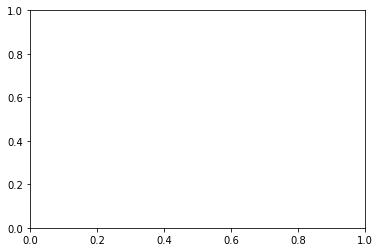

In [99]:
n_clusters = np.arange(1,13)
bic_scores = np.zeros(12)

for n in n_clusters:
    gm = GaussianMixture(n_components= n, random_state = 42).fit(cluster_df)
    bic_scores[n-1] = gm.bic(cluster_df)
    


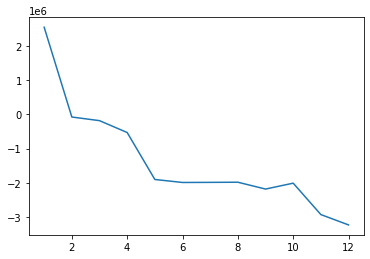

In [100]:
plt.plot(n_clusters, bic_scores)

In [95]:
n_clusters = np.arange(1,13)
n_clusters

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(cluster_df)
pca.explained_variance_ratio_

array([0.33510118, 0.24665309])

In [61]:
df

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0
4,-34.914194,-57.938219,2.0,1.0,1.0,50.0,35.0,40000.0
...,...,...,...,...,...,...,...,...
146655,-34.816348,-58.181963,2.0,1.0,1.0,54.0,48.0,165000.0
146656,-34.446459,-58.937810,4.0,3.0,2.0,164.0,90.0,130000.0
146657,-34.444633,-58.981606,1.0,1.0,1.0,50.0,35.0,73000.0
146658,-34.444830,-58.981796,2.0,1.0,1.0,38.0,38.0,68000.0


## Aplicamos nuestros datos a un modelo sencillo:
- Decision Tree
- KNN distance

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from scipy.stats import uniform, truncnorm, randint

In [28]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = simple_pipeline(X_train)
X_test = simple_pipeline(X_test)

tree = DecisionTreeRegressor(max_depth = 15, random_state = 42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
r2_score(y_test, y_pred)

0.6582779560827581

<BarContainer object of 7 artists>

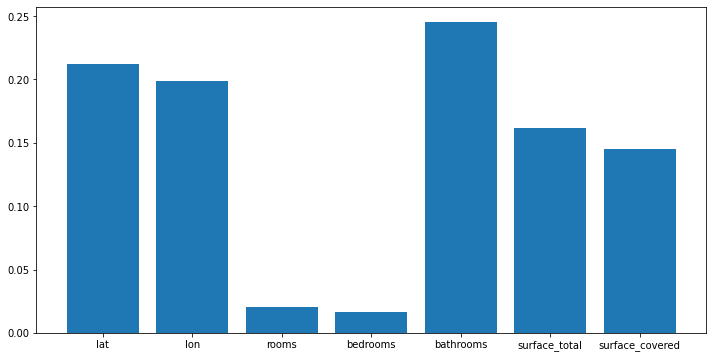

In [29]:
feat_impo = tree.feature_importances_
plt.figure(figsize=(12,6))
plt.bar(x = X_train.columns, height = feat_impo)

In [30]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = scaled_pipeline(X_train)
X_test = scaled_pipeline(X_test)

knr = KNeighborsRegressor(n_neighbors = 25, weights = 'distance')
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
r2_score(y_test, y_pred)

0.7164036307539565

## Acerca de las predicciones:
Las predicciones para nuestro modelo del sprint 2, resultaron peores que nuestras mediciones del modelo Sprint 1, presuntamente porque estamos tratando con datos un poco mas reales, con menos informacion, la necesidad de rescatar informacion y reemplazar valores agrega parte de error no importa que tan bien se haga.

Sin embargo vamos a ver como responde nuestro modelo al simplemente eliminar nuestras columnas con datos faltantes:

Eliminar los rows de datos con NA seria trampa, porque hay que garantizar que se realizen predicciones incluso para datos con espacios faltantes.

In [31]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()
X.drop(columns = ['l3','property_type'], inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())
ss_1 = StandardScaler()
X_train = ss_1.fit_transform(X_train)
X_test = ss_1.transform(X_test)

In [33]:
tree_2 = DecisionTreeRegressor(max_depth = 15)
tree_2.fit(X_train, y_train)
y_pred = tree_2.predict(X_test)
r2_score(y_test, y_pred)

0.591633653461686

In [34]:
knr = KNeighborsRegressor(n_neighbors = 25, weights = 'distance')
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
r2_score(y_test, y_pred)

0.6913878550045416

Despues de un sencillo preprocesamiento los datos predictivos del arbol de decision son mejores, sin embargo empeoro nuestro knn regresor, parece que valio la pena el preprocesamiento realizado. La ingenieria de datos en muchos casos es de trial and error.

Generalmente el arbol de decision funciona mejor para un numero pequeño de variables predictoras, puede ser uno de los factores por los cuales se obtuvieron mejores resultados que en el preprocesamiento anterior.

## Modelos avanzados.
Vamos a probar primero con un arbol de decision:

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_test = simple_pipeline(X_test)
X_train = simple_pipeline(X_train)

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2_score(y_test, y_pred)

0.713970885145915

In [38]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_test = scaled_pipeline(X_test)
X_train = scaled_pipeline(X_train)

rfr = RandomForestRegressor(n_estimators = 50)
params = {'max_depth': [x for x in np.arange(1,25,1)],
         'max_features': ['auto','log2']}

rfr_opt = RandomizedSearchCV(estimator = rfr, param_distributions = params, n_iter = 20,
                                cv = 4, scoring = 'r2', random_state=42, n_jobs = -1)

rfr_opt.fit(X_train, y_train)
y_pred = rfr_opt.predict(X_test)
r2_score(y_test, y_pred)

0.7396997241637235

<BarContainer object of 7 artists>

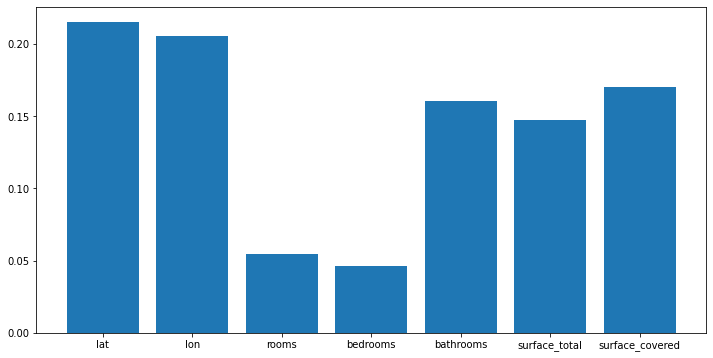

In [39]:
best_est = rfr_opt.best_estimator_
feat_impo = best_est.feature_importances_
plt.figure(figsize=(12,6))
plt.bar(x = X_train.columns, height = feat_impo)

<BarContainer object of 7 artists>

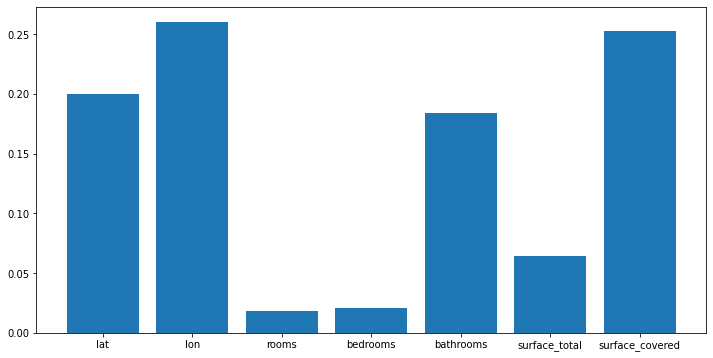

In [41]:
best_est = rfr_opt.best_estimator_
feat_impo = best_est.estimators_[0].feature_importances_
plt.figure(figsize=(12,6))
plt.bar(x = X_train.columns, height = feat_impo)

<BarContainer object of 7 artists>

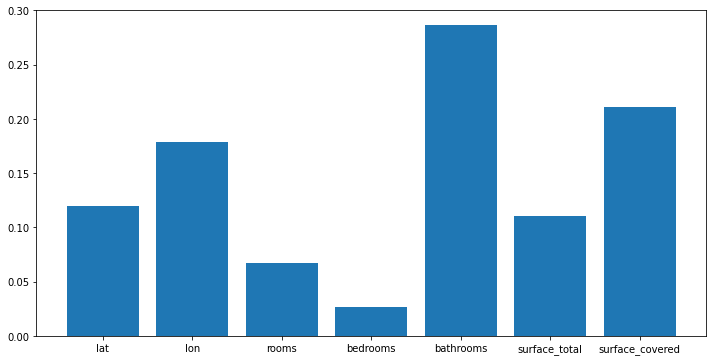

In [42]:
best_est = rfr_opt.best_estimator_
feat_impo = best_est.estimators_[1].feature_importances_
plt.figure(figsize=(12,6))
plt.bar(x = X_train.columns, height = feat_impo)

In [44]:
print("Mejores parametros: "+str(rfr_opt.best_params_))
print("Mejor Score: "+str(rfr_opt.best_score_))

Mejores parametros: {'max_features': 'log2', 'max_depth': 22}
Mejor Score: 0.6649007353234949


In [45]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [46]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_test = polinomial_pipeline(X_test, 2)
X_train = polinomial_pipeline(X_train, 2)

lasso = linear_model.Lasso()

lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2_score(y_test, y_pred)

0.29667290803905055

In [47]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_test = polinomial_pipeline(X_test, 2)
X_train = polinomial_pipeline(X_train, 2)

lasso = linear_model.Lasso()
params = {'alpha': [x for x in np.array([35, 20, 10, 1, 0.5, 0.1])]}

lasso_opt = GridSearchCV(estimator = lasso, param_grid = params, cv = 4, scoring = 'r2', n_jobs = -1)

lasso_opt.fit(X_train, y_train)
y_pred = lasso_opt.predict(X_test)
r2_score(y_test, y_pred)

0.2966631127979138

In [48]:
print("Mejores parametros: "+str(lasso_opt.best_params_))
print("Mejor Score: "+str(lasso_opt.best_score_))

Mejores parametros: {'alpha': 35.0}
Mejor Score: 0.25249022423273715


In [58]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()
X = simple_pipeline(X)

In [59]:
poly = PolynomialFeatures(2, include_bias = False)
poly.fit(X)


['lat',
 'lon',
 'rooms',
 'bedrooms',
 'bathrooms',
 'surface_total',
 'surface_covered',
 'lat^2',
 'lat lon',
 'lat rooms',
 'lat bedrooms',
 'lat bathrooms',
 'lat surface_total',
 'lat surface_covered',
 'lon^2',
 'lon rooms',
 'lon bedrooms',
 'lon bathrooms',
 'lon surface_total',
 'lon surface_covered',
 'rooms^2',
 'rooms bedrooms',
 'rooms bathrooms',
 'rooms surface_total',
 'rooms surface_covered',
 'bedrooms^2',
 'bedrooms bathrooms',
 'bedrooms surface_total',
 'bedrooms surface_covered',
 'bathrooms^2',
 'bathrooms surface_total',
 'bathrooms surface_covered',
 'surface_total^2',
 'surface_total surface_covered',
 'surface_covered^2']

<BarContainer object of 35 artists>

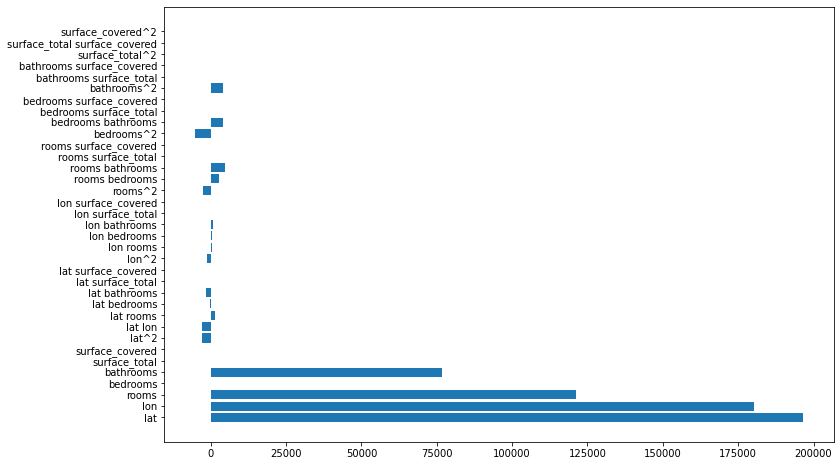

In [65]:
best_est = lasso_opt.best_estimator_
feat_impo = best_est.coef_
plt.figure(figsize=(12,8))
plt.barh(y = poly.get_feature_names(X.columns), width = feat_impo)

In [85]:
y = df.price.copy()
X = df.drop(columns = 'price').copy()
X = scaled_pipeline(X)
X['Price'] = y
X['Absolute_error'] = abs(X['Price'] - rfr_opt.predict(X.drop(columns = 'Price')))



<AxesSubplot:>

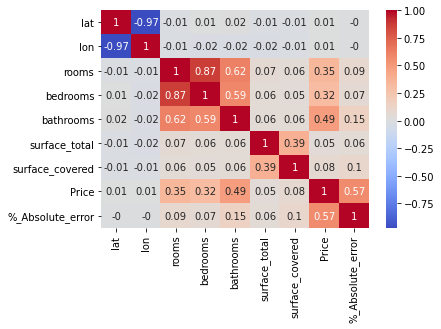

In [84]:
sns.heatmap(X.corr().round(2), annot = True, cmap = 'coolwarm')

<AxesSubplot:xlabel='Price', ylabel='Absolute_error'>

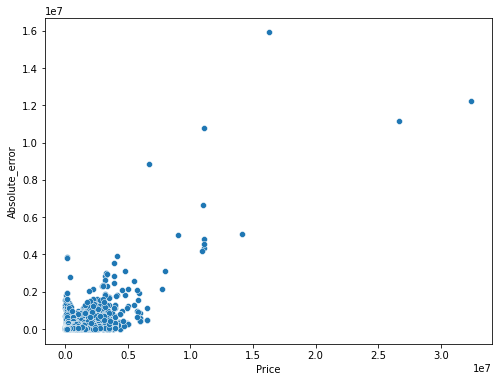

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = X.Price, y = X.Absolute_error)